## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook
from scipy.stats import linregress
%matplotlib inline
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"



# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)





In [9]:
# View the Mouse dataframe
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
# View the results dataframe
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [16]:

merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
merge_table.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [17]:
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Merge and see if we need to clean the data
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Review the information on the newly created merged dataframe
combined_data.info()
## There doesnt seem to be any missing mice or duplicates all 1893 are counted##

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

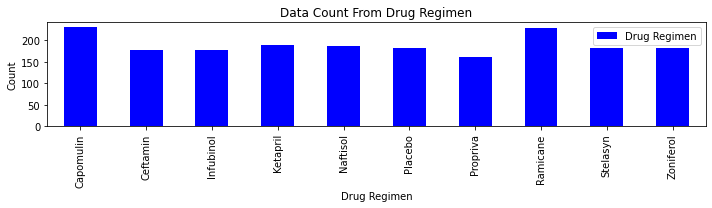

In [25]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

Drug_group = combined_data.groupby('Drug Regimen')


Drug_group_count = pd.DataFrame(Drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = Drug_group_count.plot(kind='bar', title="Data Count From Drug Regimen", figsize=(10,3), color="blue")

# X & Y labels
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()


plt.show()

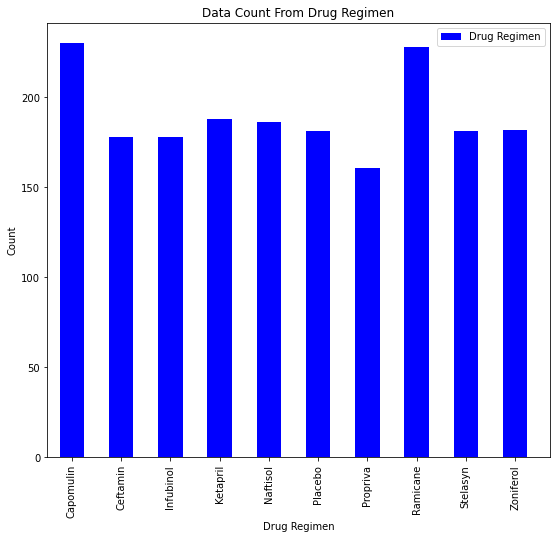

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(Drug_group_count))
tick_locations = [value for value in x_axis]


plt.figure(figsize=(9,8))
plt.bar(x_axis, Drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(Drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.3)
plt.ylim(0, max(Drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Data Count From Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


plt.show()

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data.groupby('Sex')

gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count.head()


,Sex
Sex,
Female,935
Male,958


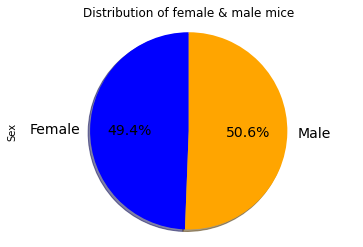

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group_count.plot(kind='pie', y='Sex', \
    title="Distribution of female & male mice",startangle=90,\
autopct='%1.1f%%',shadow=True, fontsize=14, colors =["blue","orange"],legend =False)

plt.axis("equal")
plt.show()


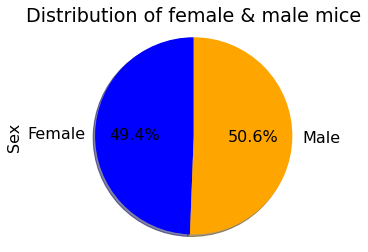

In [40]:
# Pyplot Pie Chart
genders = list(gender_group_count.index.values)
gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female & male mice")
plt.ylabel("Sex")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a list of the four drugs to examine
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


four_drugs = combined_data[combined_data['Drug Regimen'].isin(drug_list)]
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(2)

# View the groupby dataframe
last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128                38.98
             b742                38.94
             f966                30.49
             g288                37.07
             g316                40.16
...                                ...
Ramicane     s508                30.28
             u196                40.67
             w678                43.17
             y449                44.18
             z578                30.64

[100 rows x 1 columns]

In [50]:

four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.97,NaN
a251,Last_tumor_size,NaN,NaN,65.53,NaN
a275,Last_tumor_size,NaN,63.0,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.41
a444,Last_tumor_size,NaN,NaN,NaN,43.05


In [45]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    
counter = 0

# Quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


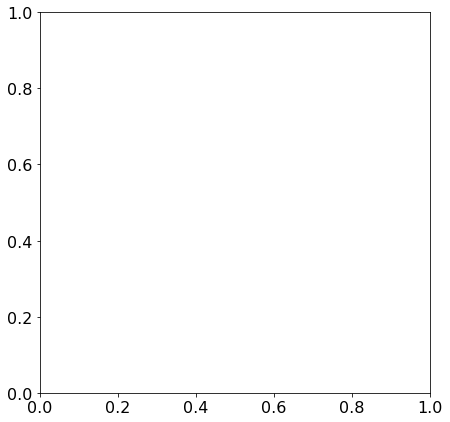

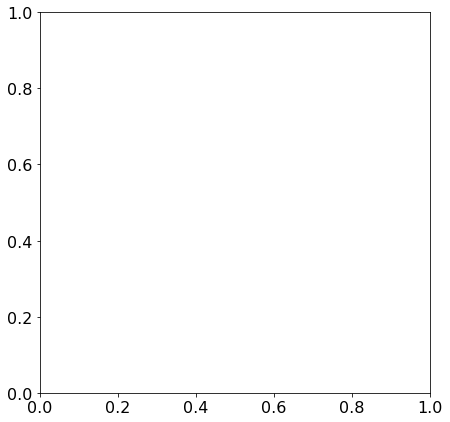

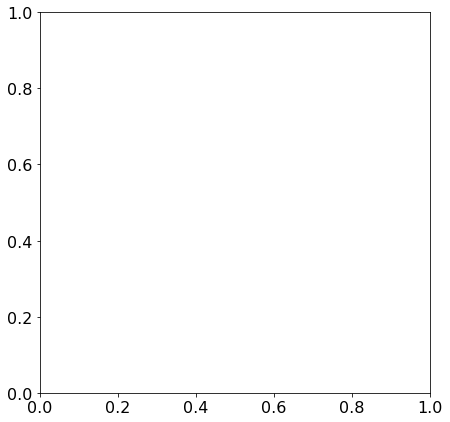

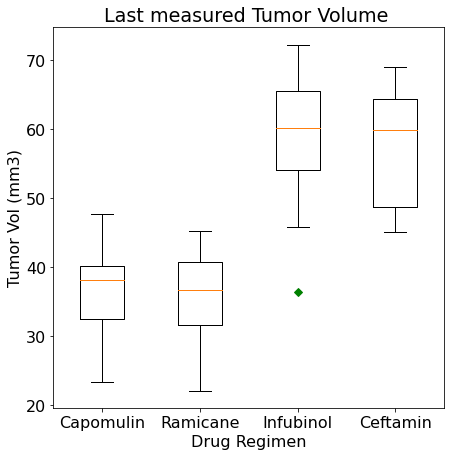

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))
    
    fig1, ax = plt.subplots(figsize=(7,7))
ax.set_title('Last measured Tumor Volume ')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and Scatter Plots

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
Capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [72]:
Capomulin_tumor = Capomulin_data.groupby(['Timepoint']).agg(\
        # Mean of the 'Tumor Volume (mm3)' column
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # SEM of the 'Tumor Volume (mm3)' column
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
                                                           ).round(2)
 
Capomulin_tumor.head(10)

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.00,0.00
5,44.27,0.45
10,43.08,0.70
15,42.06,0.84
20,40.72,0.91
25,39.94,0.88
30,38.77,0.93
35,37.82,1.05
40,36.96,1.22


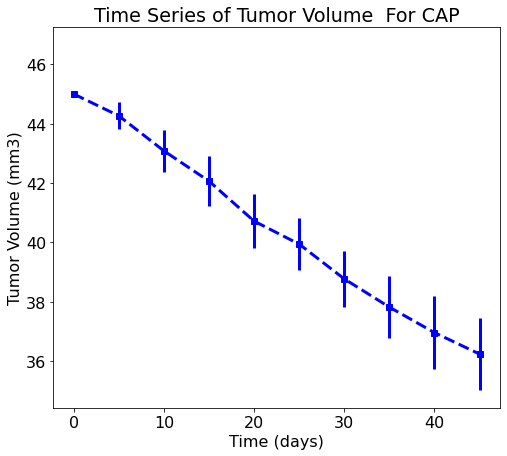

In [82]:
Time = list(cap_time_tumor.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    Time,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume  For CAP")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(Time)-max(Time)*0.05, max(Time)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [7,7]


plt.show()

In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_mouse_id = Capomulin_data.groupby(['Mouse ID']).agg(\
        # Mean
        Mouse_weight=('Weight (g)', np.mean),\
        # standard error of measurement 
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(2)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.96
b742,21,40.08
f966,17,36.51
g288,19,41.99
g316,22,44.61
i557,24,44.81
i738,20,39.14
j119,23,44.47
j246,21,43.22


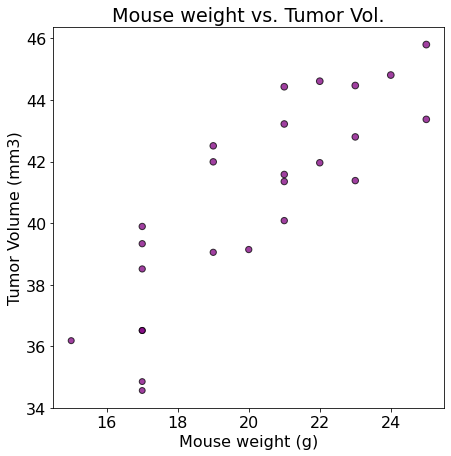

In [93]:
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='purple',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Graph labels
plt.title("Mouse weight vs. Tumor Vol.")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation = st.pearsonr(cap_mouse_id['Mouse_weight']
,cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8418558779004007
The equation of the regression line is: y = 0.95x + 21.56


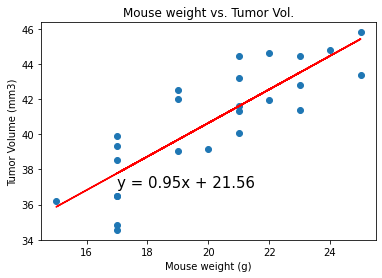

In [99]:
X = cap_mouse_id['Mouse_weight']
Y = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, r_value, p_value, stderr) = linregress(X, Y)
regress_values = X * slope + intercept

line_equation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(X,Y)
plt.plot(X,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Tumor Vol.")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {r_value}")
print(f"The equation of the regression line is: {line_equation}")


plt.show()